In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as npi
from algos.classification.perceptron import Perceptron as Perceptron

# import Iris dataset
data = pd.read_csv("./data/iris/Iris.csv")

# Remove id column
data = data.loc[:, "SepalLengthCm":]

# list 5 first entries
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# describe with useful metrics the dataset
species_distinct = data.Species.unique()
print(species_distinct)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [3]:
# group by species
grouped = data.groupby(data.Species)

# extract setosa and versicolor species
setosa = grouped.get_group("Iris-setosa")
versicolor = grouped.get_group("Iris-versicolor")

# show mean of setosa and versicolor petal and sepal length
print("Setosa sepal mean length", setosa.SepalLengthCm.mean(), "petal mean length", setosa.PetalLengthCm.mean())
print("Versicolor sepal mean length", versicolor.SepalLengthCm.mean(), "petal mean length", versicolor.PetalLengthCm.mean())

Setosa sepal mean length 5.006 petal mean length 1.464
Versicolor sepal mean length 5.936 petal mean length 4.26


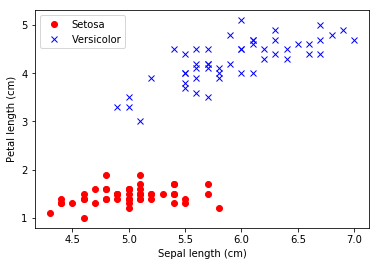

In [4]:
# plot setosa and versicolor setal vs petal length

plt.plot(setosa["SepalLengthCm"], setosa["PetalLengthCm"], 'ro', label="Setosa")
plt.plot(versicolor["SepalLengthCm"], versicolor["PetalLengthCm"], 'bx', label="Versicolor")
plt.xlabel("Sepal length (cm)")
plt.ylabel("Petal length (cm)")
plt.legend(loc="upper left")
plt.show()

In [5]:
X_setosa_versicolor = pd.concat([setosa, versicolor], axis=0)
X = X_setosa_versicolor.iloc[:, [0, 2]].values
y = X_setosa_versicolor.iloc[:, 4].values

y = npi.where(y == "Iris-setosa", 1 , -1)

pp = Perceptron(eta=0.1, n_iter=10)
pp.fit(X, y)
print("Errors: ", pp.errors_, ", weights:", pp.w_)

Errors:  [1, 3, 3, 2, 1, 0, 0, 0, 0, 0] , weights: [ 0.4   0.7  -1.84]


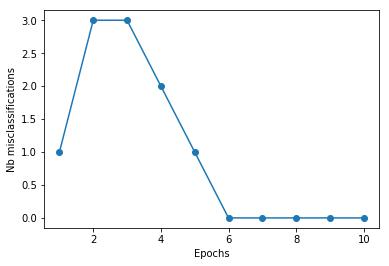

In [6]:
plt.plot(range(1, pp.n_iter + 1), pp.errors_, "-o")
plt.xlabel("Epochs")
plt.ylabel("Nb misclassifications")
plt.show()